# Problem Statement:
Car Data- Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Q1. Load the Cars Data and necesary modules file into Python DataFrame and view top 10 rows

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

cars_df = pd.read_csv('cars.csv')
cars_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Q2.  Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [11]:
cars_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [12]:
cars_df.shape

(398, 9)

In [13]:
cars_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
cars_df.drop('car_name', axis = 1, inplace = True)

In [17]:
# lets standardize the data by scaling the attributes 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cars_Scaled = sc.fit_transform(cars_df)
cars_Scaled = pd.DataFrame(cars_Scaled, columns = cars_df.columns)

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
cars_Scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.664133,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.574594,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.184397,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.184397,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.924265,0.565841,-1.840117,-1.627426,-0.715145


# Q3. Check for missing value check, incorrect data and perform imputation with mean, median and mode as necessary

In [28]:
cars_df = cars_df.replace('?', np.nan)
from sklearn.impute import SimpleImputer
simpleImputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
simpleImputer.fit(cars_df)
cols = cars_df.columns
cars_s = simpleImputer.transform(cars_df)
cars_s = pd.DataFrame(cars_s, columns = cols)

In [29]:
cars_s.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

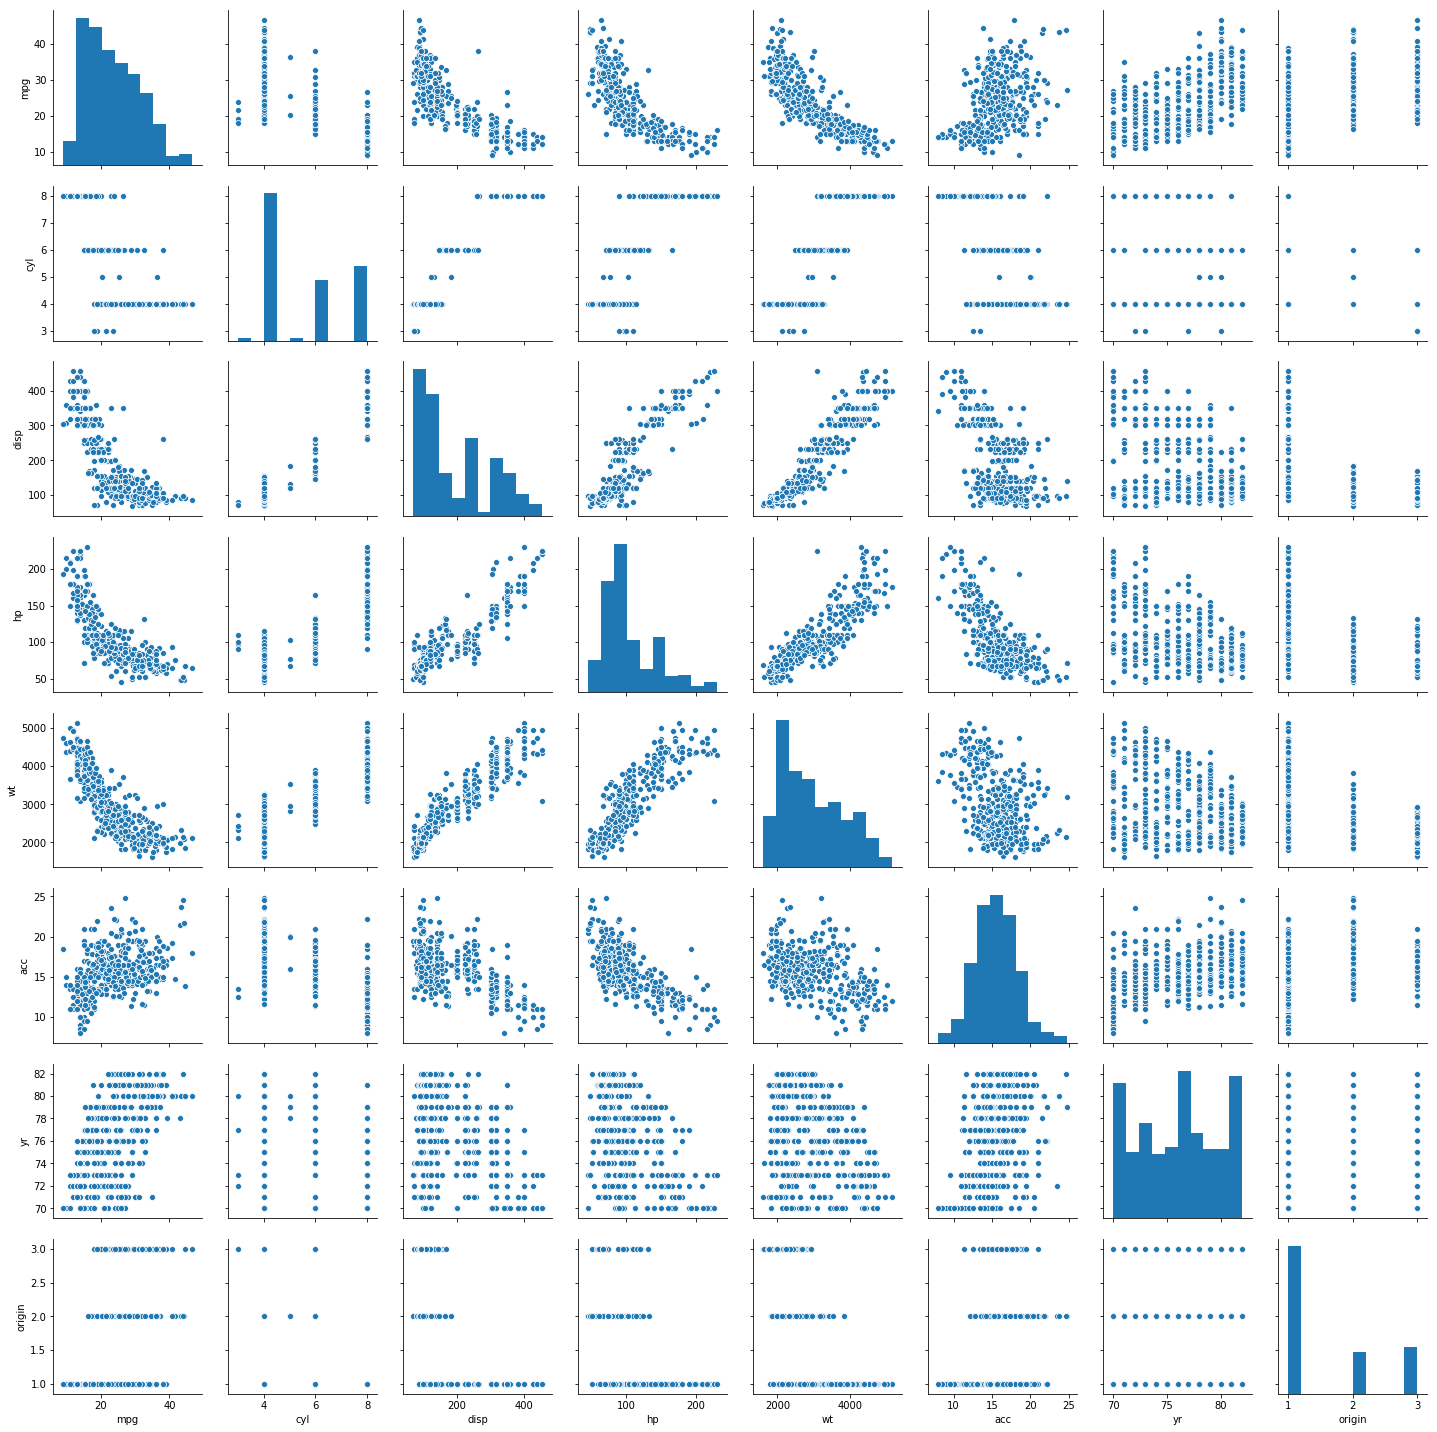

In [21]:
# lets plot the bi variate correlation plot 
sns.pairplot(cars_s)

In [22]:
cars_s.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [30]:
cars_s['origin'] = cars_s['origin'].astype('uint8')
one_hot = pd.get_dummies(cars_s['origin'], drop_first=True)
one_hot = one_hot.add_prefix("origin_")
cars_s = cars_s.join(one_hot)

In [31]:
cars_s.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,origin_2,origin_3
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [47]:
sc = StandardScaler()
cols = cars_s.columns
Cars_Scaled = sc.fit_transform(cars_s)
cars_scaled = pd.DataFrame(Cars_Scaled, columns= cols)

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
cars_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,-0.461968,-0.497643
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,-0.461968,-0.497643
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,-0.461968,-0.497643
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,-0.461968,-0.497643
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,-0.461968,-0.497643


# Q7. Create appropriate clusters with the new data set

In [51]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters = range(1, 10)
meanDistortion = []

for k in clusters:
    model = KMeans(n_clusters= k)
    model.fit(cars_scaled)
    predictions = model.predict(cars_scaled)
    meanDistortion.append(sum(np.min(cdist(cars_scaled, model.cluster_centers_, 'euclidean'), axis = 1)) / cars_scaled.shape[0])

# Q8. Identify the appropriate clusters with result from above question

Text(0.5, 1.0, 'Selecting k with elbow method')

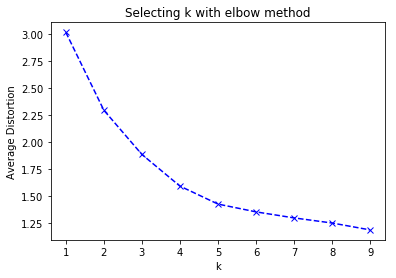

In [55]:
plt.plot(clusters, meanDistortion, 'bx--')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with elbow method')

In [57]:
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(cars_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=12345, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables

In [63]:
labels = kmeans.labels_
counts = np.bincount(labels[labels >= 0])
print(counts)

[100  79  70 149]


In [64]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_scaled))
centroid_df.transpose()

,0,1,2,3
mpg,-1.127260,0.888537,0.560693,0.022034
cyl,1.486419,-0.796713,-0.763822,-0.216336
disp,1.468657,-0.871117,-0.809334,-0.143585
hp,1.473388,-0.640965,-0.612330,-0.361339
wt,1.367364,-0.885809,-0.646890,-0.144129
acc,-1.033718,0.219322,0.442612,0.369547
yr,-0.611986,0.388030,-0.053010,0.229898
origin,-0.715145,1.781589,0.533222,-0.715145
origin_2,-0.461968,-0.461968,2.164651,-0.461968
origin_3,-0.497643,2.009471,-0.497643,-0.497643


# Q10. Assign the groups created above to data frame and study the characteristics for each group.

In [68]:
predictions = kmeans.predict(cars_scaled)
predictions
cars_df["group"] = predictions
cars_df["group"] = cars_df["group"].astype("category")
cars_df.dtypes

mpg        float64
cyl          int64
disp       float64
hp          object
wt           int64
acc        float64
yr           int64
origin       int64
group     category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020244145668>,
      dtype=object)

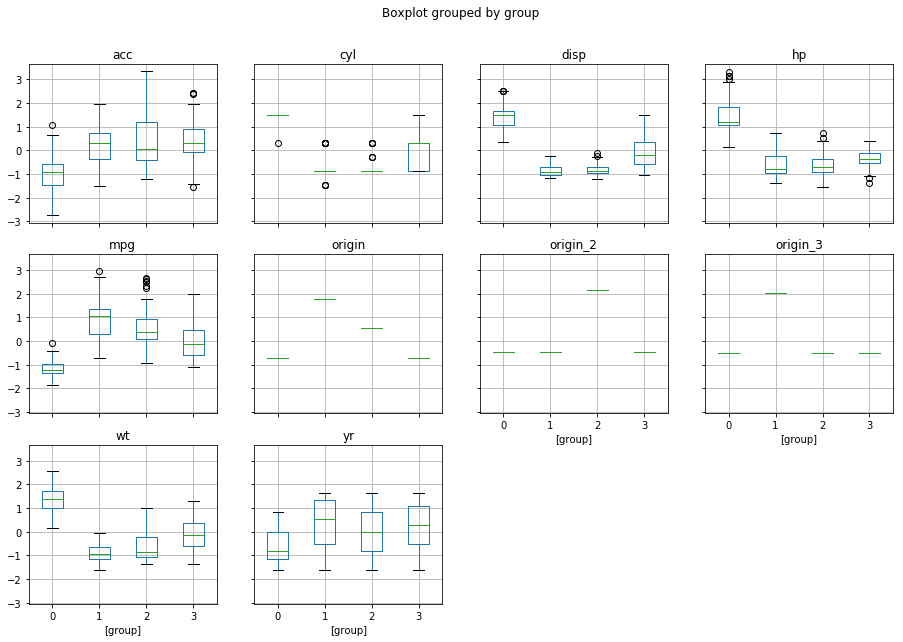

In [71]:
cars_scaled["group"] = predictions
cars_scaled.boxplot(by = "group", layout = (3,4), figsize = (15, 10))